<a href="https://colab.research.google.com/github/Weedmastercrucifer/Neural-Networks-and-Fuzzy-Logic/blob/main/Assignment1Details/Assignment1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

Assignment 1 Q3

In [ ]:
def cost_function(X,y,w,L):
  hypothesis=np.dot(X,w.T)#calculating hypothesis of all instances
  J=(1/(2*len(y)))*np.sum((hypothesis-y)**2)+((L/(2*len(y)))*np.sum(abs(w)))
  return J

In [ ]:
#For mean square error
def mean_square_error(y_pred,y_actual):
  mse=(1/len(y_actual))*(np.sum(y_pred-y_actual)**2)
  return mse

In [ ]:
#For mean absolute error
def mean_absolute_error(y_pred,y_actual):
  mae=(1/len(y_actual))*np.sum(np.absolute(y_pred-y_actual)) 
  return mae

In [ ]:
#for correlation coefficient 
def correlation_coefficient(y_pred,y_actual):
  y_pred_mean=(1/len(y_pred))*(np.sum(y_pred))
  y_actual_mean=(1/len(y_actual))*(np.sum(y_actual))
  cc=(np.sum((y_actual-y_actual_mean)*(y_pred-y_pred_mean)))/(np.sqrt(np.sum((y_actual-y_actual_mean)**2))*np.sqrt(np.sum((y_pred-y_pred_mean)**2)))
  return cc

In [ ]:
def batch_gradient_descent(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,5))#for storing weight values at each iteration
  for t in range(iters): 
    hw=np.dot(X,w.T)#constructing hypothesis 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/(len(y)))*(np.dot(hw-y,X))
    w_hist[t]=w#storing w values of each iteration
    cost_hist[t]=cost_function(X,y,w,Lambda_)#storing cost function value of that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]
  return w,cost_hist,w_hist,w_best,cost_hist[minpos] 

In [ ]:
def stochastic_gradient_descent(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,5))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-alpha*(Ind_X.T.dot(Ind_X.dot(w)-Ind_Y)) 
    w_hist[t]=w
    cost_hist[t]=cost_function(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w,cost_hist,w_hist,w_best,cost_hist[minpos]

In [ ]:
def minibatch_gradient_descent(X,y,w,alpha,iters,batch_size,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,5))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/batch_size)*(Ind_X.T.dot(Ind_X.dot(w)-Ind_Y))#updating thw weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w,cost_hist,w_hist,w_best,cost_hist[minpos]  


In [ ]:
iters_list=[500,1000,1500,2000,5000,10000]
alpha_List=np.linspace(0.05,0.06,num=10)
Lambda_List=np.linspace(0.005,0.006,num=10) 


In [ ]:
#grid search for best alpha,lambda and weights
  
def grid_search_bgd(X_train,y_train,alpha_List,Lambda_List,iters_list):
  cost_minimum=math.inf
  alpha_best=0
  Lambda_best=0  
  iters_best=0
  w_best=np.zeros(X_train.shape[1]) 
  cost_hist_best=[] 
  for iters in iters_list: 
    
    for alpha in alpha_List:
      for Lambda_ in Lambda_List:
        w_batch_train,cost_hist_batch_train,w_batch_hist_train,w_batch_best,cost_batch_min=batch_gradient_descent(X_train,y_train,w,alpha,iters,Lambda_)
        if(cost_batch_min<cost_minimum): 
          w_best=w_batch_best
          alpha_best=alpha
          Lambda_best=Lambda_  
          iters_best=iters 
          cost_hist_best=cost_hist_batch_train.tolist() 
          cost_minimum=cost_batch_min
  return w_best,alpha_best,Lambda_best,iters_best,cost_hist_best

In [ ]:
#grid search for sgd
def grid_search_sgd(X_train,y_train,alpha_List,Lambda_List,iters_list):
  cost_minimum=math.inf
  alpha_best=0
  Lambda_best=0  
  iters_best=0
  w_best=np.zeros(X_train.shape[1]) 
  cost_hist_best=[] 
  for iters in iters_list: 
    
    for alpha in alpha_List:
      for Lambda_ in Lambda_List:
        w_stoch_train,cost_hist_stoch_train,w_stoch_hist_train,w_stoch_best,cost_stoch_min=stochastic_gradient_descent(X_train,y_train,w,alpha,iters,Lambda_)
        if(cost_stoch_min<cost_minimum): 
          w_best=w_stoch_best
          alpha_best=alpha
          Lambda_best=Lambda_  
          iters_best=iters 
          cost_hist_best=cost_hist_stoch_train.tolist() 
          cost_minimum=cost_stoch_min
  return w_best,alpha_best,Lambda_best,iters_best,cost_hist_best

In [ ]:
#grid search for mbgd
#batch_size_list=[2,4,6,8]
def grid_search_mbgd(X_train,y_train,alpha_List,Lambda_List,iters_list):
  cost_minimum=math.inf
  alpha_best=0
  Lambda_best=0  
  iters_best=0
  w_best=np.zeros(X_train.shape[1]) 
  cost_hist_best=[] 
  
  for iters in iters_list: 
      
      for alpha in alpha_List:
        for Lambda_ in Lambda_List:
          w_mini_train,cost_hist_mini_train,w_mini_hist_train,w_mini_best,cost_mini_min=minibatch_gradient_descent(X_train,y_train,w,alpha,iters,5,Lambda_)
          if(cost_mini_min<cost_minimum): 
            w_best=w_mini_best
            alpha_best=alpha
            Lambda_best=Lambda_  
            iters_best=iters 
            cost_hist_best=cost_hist_mini_train.tolist() 
            cost_minimum=cost_mini_min
  return w_best,alpha_best,Lambda_best,iters_best,cost_hist_best

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Assignment1NNFL/Copy of data_q2_q3.xlsx')
data.describe()

,Feat1,Feat2,Feat3,Feat4,Output
count,115.00000,115.000000,115.000000,115.000000,115.000000
mean,0.16287,0.075435,3.117391,4.795652,1.913043
std,0.06475,0.050217,1.284746,0.579699,0.533035
min,0.03500,0.025000,1.500000,4.210000,0.800000
25%,0.12500,0.025000,2.000000,4.400000,1.800000
50%,0.17500,0.125000,3.000000,4.680000,2.200000
75%,0.19500,0.125000,4.000000,4.970000,2.200000
max,0.26000,0.125000,5.000000,5.740000,2.300000


In [ ]:
data=data.sample(frac=1, random_state=50)
train,validate,test= np.split(data,[int(.7*len(data)),int(.8*len(data))])

In [ ]:
print(train.shape)
print(validate.shape)
print(test.shape)

(80, 5)
(12, 5)
(23, 5)


In [ ]:
train=np.array(train) 
print(train)  
validate=np.array(validate) 
print(validate)
test=np.array(test) 
print(test)


[[0.245 0.125 5.    5.74  2.2  ]
 [0.245 0.025 1.5   5.74  2.2  ]
 [0.035 0.125 5.    4.68  0.8  ]
 [0.06  0.025 4.    4.68  0.9  ]
 [0.175 0.025 5.    4.21  1.8  ]
 [0.035 0.025 1.5   4.68  0.8  ]
 [0.26  0.025 2.    4.4   2.2  ]
 [0.245 0.125 1.5   5.74  2.2  ]
 [0.06  0.125 2.    4.68  0.9  ]
 [0.26  0.025 1.5   4.4   2.2  ]
 [0.035 0.025 3.    4.68  0.8  ]
 [0.235 0.125 2.    4.21  2.2  ]
 [0.13  0.025 5.    4.21  1.2  ]
 [0.155 0.125 5.    4.97  2.3  ]
 [0.125 0.125 1.5   5.74  2.2  ]
 [0.035 0.125 4.    4.68  0.8  ]
 [0.13  0.125 1.5   4.21  1.2  ]
 [0.06  0.025 5.    4.68  0.9  ]
 [0.185 0.125 5.    5.74  2.3  ]
 [0.18  0.125 1.5   4.4   2.2  ]
 [0.235 0.125 1.5   4.21  2.2  ]
 [0.125 0.125 4.    4.4   2.3  ]
 [0.155 0.125 4.    4.97  2.3  ]
 [0.18  0.125 5.    4.4   2.2  ]
 [0.245 0.025 2.    5.74  2.2  ]
 [0.125 0.125 2.    5.74  2.2  ]
 [0.195 0.025 4.    4.97  2.2  ]
 [0.235 0.025 4.    4.21  2.2  ]
 [0.155 0.025 5.    4.97  2.3  ]
 [0.195 0.125 5.    4.97  2.2  ]
 [0.125 0.

In [ ]:
X_train=train[:,0:4]
m=X_train.shape[0]
xmin=np.min(X_train,axis=0)
xmax=np.max(X_train,axis=0)
X_train=(X_train-xmin)/(xmax-xmin)#performing normalization on input features 
pp=np.ones([m,1])
X_train=np.append(pp,X_train,axis=1)

In [ ]:
X_train

array([[1.        , 0.93333333, 1.        , 1.        , 1.        ],
       [1.        , 0.93333333, 0.        , 0.        , 1.        ],
       [1.        , 0.        , 1.        , 1.        , 0.30718954],
       [1.        , 0.11111111, 0.        , 0.71428571, 0.30718954],
       [1.        , 0.62222222, 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.30718954],
       [1.        , 1.        , 0.        , 0.14285714, 0.12418301],
       [1.        , 0.93333333, 1.        , 0.        , 1.        ],
       [1.        , 0.11111111, 1.        , 0.14285714, 0.30718954],
       [1.        , 1.        , 0.        , 0.        , 0.12418301],
       [1.        , 0.        , 0.        , 0.42857143, 0.30718954],
       [1.        , 0.88888889, 1.        , 0.14285714, 0.        ],
       [1.        , 0.42222222, 0.        , 1.        , 0.        ],
       [1.        , 0.53333333, 1.        , 1.        , 0.49673203],
       [1.        , 0.4       , 1.

In [ ]:
y_train=train[:,4]#true outputs of the instances
ymin_train=np.min(y_train,axis=0)#taking minimum value
ymax_train=np.max(y_train,axis=0)#taking maximum value
y_train=(y_train-ymin_train)/(ymax_train-ymin_train)#normalising output

In [ ]:
y_train

array([0.93333333, 0.93333333, 0.        , 0.06666667, 0.66666667,
       0.        , 0.93333333, 0.93333333, 0.06666667, 0.93333333,
       0.        , 0.93333333, 0.26666667, 1.        , 0.93333333,
       0.        , 0.26666667, 0.06666667, 1.        , 0.93333333,
       0.93333333, 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 0.93333333,
       0.93333333, 0.66666667, 0.26666667, 1.        , 0.93333333,
       1.        , 0.93333333, 0.93333333, 0.66666667, 0.26666667,
       0.06666667, 0.93333333, 1.        , 0.        , 1.        ,
       0.93333333, 0.93333333, 0.66666667, 1.        , 1.        ,
       0.93333333, 0.66666667, 0.66666667, 0.06666667, 0.26666667,
       0.66666667, 0.93333333, 1.        , 0.66666667, 0.93333333,
       0.93333333, 1.        , 0.26666667, 1.        , 0.93333333,
       1.        , 0.        , 1.        , 0.06666667, 0.93333333,
       1.        , 0.93333333, 0.26666667, 1.        , 0.06666

In [ ]:
w=np.zeros(X_train.shape[1]) 
w

array([0., 0., 0., 0., 0.])

In [ ]:
#alpha=0.05
#iters=1500 
#Lambda_=0.005
#w_batch_train,cost_hist_batch_train,w_batch_hist_train=batch_gradient_descent(X_train,y_train,w,alpha,iters,Lambda_) 
w_best_batch,alpha_best_batch,Lambda_best_batch,iters_best_batch,cost_hist_best_batch=grid_search_bgd(X_train,y_train,alpha_List,Lambda_List,iters_list) 


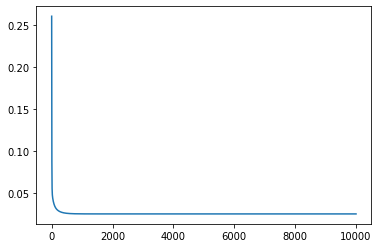

In [ ]:
plt.plot(range(iters_best_batch),cost_hist_best_batch)
plt.show()

In [ ]:
#alpha=0.05
#iters=1500 
#Lambda_=0.005
#w_stoch_train,cost_hist_stoch_train,w_stoch_hist_train=stochastic_gradient_descent(X_train,y_train,w,alpha,iters,Lambda_) 
w_best_stoch,alpha_best_stoch,Lambda_best_stoch,iters_best_stoch,cost_hist_best_stoch=grid_search_sgd(X_train,y_train,alpha_List,Lambda_List,iters_list)

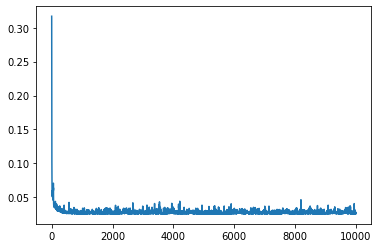

In [ ]:
plt.plot(range(iters_best_stoch),cost_hist_best_stoch)
plt.show()

In [ ]:
#alpha=0.05
#iters=1500 
#Lambda_=0.005
#w_mini_train,cost_hist_mini_train,w_mini_hist_train=minibatch_gradient_descent(X_train,y_train,w,alpha,iters,5,Lambda_)
w_best_mini,alpha_best_mini,Lambda_best_mini,iters_best_mini,cost_hist_best_mini=grid_search_mbgd(X_train,y_train,alpha_List,Lambda_List,iters_list)

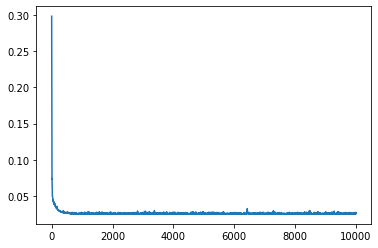

In [ ]:
plt.plot(range(iters_best_mini),cost_hist_best_mini)
plt.show()

In [ ]:
X_test=test[:,0:4]
m=X_test.shape[0]
xmin=np.min(X_test,axis=0)
xmax=np.max(X_test,axis=0)
X_test=(X_test-xmin)/(xmax-xmin)#performing normalization on input features 
pp=np.ones([m,1])
X_test=np.append(pp,X_test,axis=1)

In [ ]:
y_test=test[:,4]#true outputs of the instances
ymin_test=np.min(y_test,axis=0)#taking minimum value
ymax_test=np.max(y_test,axis=0)#taking maximum value
y_test=(y_test-ymin_test)/(ymax_test-ymin_test)#normalising output

In [ ]:
y_test

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.        , 0.93333333, 0.        , 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 0.93333333,
       1.        , 0.93333333, 0.26666667])

In [ ]:
#testing models against test data and validation data
def predict(X_test,y_test,weights):
  hypothesis=X_test@weights
  y_pred=hypothesis
  #printing predicted and actual output
  for i in range(X_test.shape[0]):
        print("Predicted: {0}  Actual:{1}".format(y_pred[i],(y_test[i])))
  return y_pred

In [ ]:
X_validate=validate[:,0:4]
m=X_validate.shape[0]
xmin_validate=np.min(X_validate,axis=0)
xmax_validate=np.max(X_validate,axis=0)
X_validate=(X_validate-xmin_validate)/(xmax_validate-xmin_validate)#performing normalization on input features 
pp=np.ones([m,1])
X_validate=np.append(pp,X_validate,axis=1)

In [ ]:
y_validate=validate[:,4]#true outputs of the instances
ymin_validate=np.min(y_validate,axis=0)#taking minimum value
ymax_validate=np.max(y_validate,axis=0)#taking maximum value
y_validate=(y_validate-ymin_validate)/(ymax_validate-ymin_validate)#normalising output

In [ ]:
#for tuning batch gradient descent
y_validate_batch=predict(X_validate,y_validate,w_best_batch) 
print('Mean absolute error is ',mean_absolute_error(y_validate_batch,y_validate)) 
print('Mean square error is',mean_square_error(y_validate_batch,y_validate))
print('Correlation coefficient is', correlation_coefficient(y_validate_batch,y_validate))

Predicted: 1.0583185128572332  Actual:1.0
Predicted: 0.23493082747588184  Actual:0.0
Predicted: 0.5254125640228575  Actual:1.0
Predicted: 1.2786854191957926  Actual:0.9333333333333336
Predicted: 0.8202209672397128  Actual:0.9333333333333336
Predicted: 1.0151648855238014  Actual:0.9333333333333336
Predicted: 0.7415317830716407  Actual:0.9333333333333336
Predicted: 0.29856789084088875  Actual:0.06666666666666667
Predicted: 0.5206131188670647  Actual:0.26666666666666666
Predicted: 0.9860551016468225  Actual:1.0
Predicted: 0.7898446075448855  Actual:0.9333333333333336
Predicted: 1.302841831432415  Actual:0.9333333333333336
Mean absolute error is  0.2093936774444854
Mean square error is 0.03401122155711686
Correlation coefficient is 0.7707817548613071


In [ ]:
#for tuning stochastic gradient descent
y_validate_stoch=predict(X_validate,y_validate,w_best_stoch) 
print('Mean absolute error is ',mean_absolute_error(y_validate_stoch,y_validate)) 
print('Mean square error is',mean_square_error(y_validate_stoch,y_validate))
print('Correlation coefficient is', correlation_coefficient(y_validate_stoch,y_validate))

Predicted: 1.0755859596347217  Actual:1.0
Predicted: 0.23854256915246888  Actual:0.0
Predicted: 0.5220525798734528  Actual:1.0
Predicted: 1.291885520558443  Actual:0.9333333333333336
Predicted: 0.8270997209732193  Actual:0.9333333333333336
Predicted: 1.0211457049308625  Actual:0.9333333333333336
Predicted: 0.7446734648395291  Actual:0.9333333333333336
Predicted: 0.29569508105072606  Actual:0.06666666666666667
Predicted: 0.5170076124975418  Actual:0.26666666666666666
Predicted: 0.9892350016089304  Actual:1.0
Predicted: 0.801197416530889  Actual:0.9333333333333336
Predicted: 1.3201474964041229  Actual:0.9333333333333336
Mean absolute error is  0.21186820225579434
Mean square error is 0.04211902352881706
Correlation coefficient is 0.7687337327877359


In [ ]:
#for tuning minibatch gradient descent
y_validate_mini=predict(X_validate,y_validate,w_best_mini) 
print('Mean absolute error is ',mean_absolute_error(y_validate_mini,y_validate)) 
print('Mean square error is',mean_square_error(y_validate_mini,y_validate))
print('Correlation coefficient is', correlation_coefficient(y_validate_mini,y_validate))

Predicted: 1.0788412287255844  Actual:1.0
Predicted: 0.23498533538236482  Actual:0.0
Predicted: 0.5206907905493768  Actual:1.0
Predicted: 1.2975428142312355  Actual:0.9333333333333336
Predicted: 0.8244232166501054  Actual:0.9333333333333336
Predicted: 1.0189623542451212  Actual:0.9333333333333336
Predicted: 0.7490935106018993  Actual:0.9333333333333336
Predicted: 0.2941936611720581  Actual:0.06666666666666667
Predicted: 0.5147401298395913  Actual:0.26666666666666666
Predicted: 0.9951528116826885  Actual:1.0
Predicted: 0.8038089417521758  Actual:0.9333333333333336
Predicted: 1.3249005298063736  Actual:0.9333333333333336
Mean absolute error is  0.2114719540693958
Mean square error is 0.0436815736178294
Correlation coefficient is 0.7691150297066222


In [ ]:
y_pred_batch=predict(X_test,y_test,w_best_batch) 
print('Mean absolute error is ',mean_absolute_error(y_pred_batch,y_test)) 
print('Mean square error is',mean_square_error(y_pred_batch,y_test))
print('Correlation coefficient is', correlation_coefficient(y_pred_batch,y_test))

Predicted: 0.9039393024663233  Actual:0.9333333333333336
Predicted: 1.1145357661535142  Actual:0.9333333333333336
Predicted: 0.9410693210120652  Actual:1.0
Predicted: 1.1352412623563335  Actual:0.9333333333333336
Predicted: 1.062977851145923  Actual:0.9333333333333336
Predicted: 0.6903015722543812  Actual:0.9333333333333336
Predicted: 0.2142253312730626  Actual:0.0
Predicted: 0.9621542852448834  Actual:0.9333333333333336
Predicted: 0.16266741626547115  Actual:0.0
Predicted: 1.1147415916529708  Actual:0.9333333333333336
Predicted: 0.9037334769668667  Actual:0.9333333333333336
Predicted: 0.883233806263504  Actual:0.9333333333333336
Predicted: 1.2023956433706153  Actual:0.9333333333333336
Predicted: 0.7594732716071162  Actual:0.9333333333333336
Predicted: 0.498544590941677  Actual:1.0
Predicted: 1.0035652776505217  Actual:0.9333333333333336
Predicted: 0.8728810581620944  Actual:0.9333333333333336
Predicted: 1.0940360954501518  Actual:0.9333333333333336
Predicted: 0.9930388870185698  Actua

In [ ]:
y_pred_stoch=predict(X_test,y_test,w_best_stoch) 
print('Mean absolute error is ',mean_absolute_error(y_pred_stoch,y_test)) 
print('Mean square error is',mean_square_error(y_pred_stoch,y_test))
print('Correlation coefficient is', correlation_coefficient(y_pred_stoch,y_test))

Predicted: 0.9099572960061988  Actual:0.9333333333333336
Predicted: 1.1282609819157867  Actual:0.9333333333333336
Predicted: 0.9453294466618348  Actual:1.0
Predicted: 1.1524855326406551  Actual:0.9333333333333336
Predicted: 1.0661345746148638  Actual:0.9333333333333336
Predicted: 0.6906941682210923  Actual:0.9333333333333336
Predicted: 0.21431801842760032  Actual:0.0
Predicted: 0.970158138413441  Actual:0.9333333333333336
Predicted: 0.1521916111266775  Actual:0.0
Predicted: 1.1266959514270354  Actual:0.9333333333333336
Predicted: 0.9115223264949501  Actual:0.9333333333333336
Predicted: 0.8857327452813303  Actual:0.9333333333333336
Predicted: 1.21051196997626  Actual:0.9333333333333336
Predicted: 0.7645227266032614  Actual:0.9333333333333336
Predicted: 0.4947702286119447  Actual:1.0
Predicted: 1.0186072398631782  Actual:0.9333333333333336
Predicted: 0.873620469918896  Actual:0.9333333333333336
Predicted: 1.1024714007021668  Actual:0.9333333333333336
Predicted: 1.004325792985255  Actual:

In [ ]:
y_pred_mini=predict(X_test,y_test,w_best_mini) 
print('Mean absolute error is ',mean_absolute_error(y_pred_mini,y_test)) 
print('Mean square error is',mean_square_error(y_pred_mini,y_test))
print('Correlation coefficient is', correlation_coefficient(y_pred_mini,y_test))

Predicted: 0.9108350120688921  Actual:0.9333333333333336
Predicted: 1.1261485000936706  Actual:0.9333333333333336
Predicted: 0.9511985792241819  Actual:1.0
Predicted: 1.1495979705866464  Actual:0.9333333333333336
Predicted: 1.0659095535437502  Actual:0.9333333333333336
Predicted: 0.6960093636786497  Actual:0.9333333333333336
Predicted: 0.2115358648893892  Actual:0.0
Predicted: 0.9676347776922771  Actual:0.9333333333333336
Predicted: 0.15129691833946873  Actual:0.0
Predicted: 1.1245332297761892  Actual:0.9333333333333336
Predicted: 0.9124502823863734  Actual:0.9333333333333336
Predicted: 0.8873855415759164  Actual:0.9333333333333336
Predicted: 1.2164972596987205  Actual:0.9333333333333336
Predicted: 0.762446742206652  Actual:0.9333333333333336
Predicted: 0.49334908888378415  Actual:1.0
Predicted: 1.0145337186782284  Actual:0.9333333333333336
Predicted: 0.8756608063294287  Actual:0.9333333333333336
Predicted: 1.1010837592832137  Actual:0.9333333333333336
Predicted: 1.0082069851391398  Ac